In [4]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices
pd.options.mode.chained_assignment = None
#pd.options.display.mpl_style = 'default'
from sklearn import preprocessing

from sklearn.metrics import accuracy_score, roc_curve, auc, classification_report, confusion_matrix

from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.learning_curve import learning_curve
from sklearn.grid_search import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import pprint
import pickle
import dateutil
%matplotlib inline

In [7]:
df = pd.DataFrame(pickle.load(open('../data_files/cleaned_data_with_features.pkl', 'rb')))

In [8]:
df.head()

,_projectid,_teacher_acctid,_schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,RESP,month,quarter,year,time_to_expire,amount_optional_support,optional_support,per_optional_support,school_previous_projects,teacher_previous_projects
0,7342bd01a2a7725ce033a179d22e382d,5c43ef5eac0f5857c266baa1ccfa3d3f,9e72d6f2f1e9367b578b6479aa5852b7,3.600097e+11,40.688454,-73.910432,Brooklyn,NY,11207,urban,...,1,9,3,2002,474 days,50.27,1,0.219520,0,0
1,b56b502d25666e29550d107bf7e17910,57426949b47700ccf62098e1e9b0220c,4a06a328dd87bd29892d73310052f45f,3.600077e+11,40.770233,-73.950760,New York,NY,10075,NaN,...,1,9,3,2002,471 days,27.44,1,0.219520,0,0
2,3a88a47f97bd0c9b7c6a745bcd831ce3,7a20087fac86232883537cab45c0a6c9,66d08b506d2f3c30dec9e6fdb03cc279,3.600122e+11,40.729763,-73.816925,Flushing,NY,11367,urban,...,1,9,3,2002,470 days,402.80,1,0.219510,0,0
3,0b8a4f8eb1822ab6dd5cd9ffb918ece3,e5d28482308e2007992ae8b358b31bce,9bc7d4d92193a453669b6e2a56128e87,3.600077e+11,40.701778,-74.011840,New York,NY,10004,urban,...,1,9,3,2002,470 days,247.83,1,0.219513,0,0
4,45235cb116b3b35cd86d1c3a63961d7d,214d75bd0e6ce3e7085278ddd8f26daa,f7f12dee0009e6f9afa301bcca9d5070,NaN,40.815018,-73.856094,Bronx,NY,10473,urban,...,1,9,3,2002,470 days,18.22,1,0.219518,0,0


In [10]:
features = df.columns.values.tolist()
for feature in features:
    per = (len(df[feature]) - df[feature].count())/len(df[feature])
    if per > 0.0:
        print feature, "has %0.2f percent missing values" % (per*100)

school_ncesid has 5.57 percent missing values
school_zip has 0.00 percent missing values
school_metro has 11.23 percent missing values
school_district has 0.04 percent missing values
school_county has 0.00 percent missing values
teacher_prefix has 0.00 percent missing values
primary_focus_subject has 0.00 percent missing values
primary_focus_area has 0.00 percent missing values
secondary_focus_subject has 30.71 percent missing values
secondary_focus_area has 30.71 percent missing values
resource_type has 0.01 percent missing values
grade_level has 0.00 percent missing values
vendor_shipping_charges has 4.11 percent missing values
sales_tax has 4.11 percent missing values
payment_processing_charges has 4.11 percent missing values
fulfillment_labor_materials has 4.11 percent missing values
students_reached has 0.02 percent missing values
date_completed has 29.95 percent missing values
date_thank_you_packet_mailed has 35.63 percent missing values
date_expiration has 0.02 percent missing v

In [152]:
#TO DO
#general:    
    #decide if i should only use recent projects
    #for each column, check missing or 0 values, and decide how to handle
    #fill in urban by creating list of zips with missing and looking up
#For modeling:
    #Test different scalers
    #Test different parameters
    #Check coeffiecients to see what is important
    #Try clustering without response and print centroids - see if they are meaningful
    #Try binning continuous features
#Check distros and decide if valuable:
    #school types

In [13]:
funded = df[df['RESP'] == 1]
not_funded = df[df['RESP'] == 0]

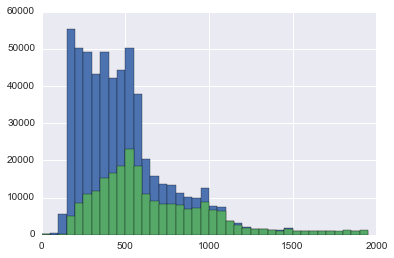

In [14]:
funded.total_price_including_optional_support.hist(bins = range (0,2000,50))
not_funded.total_price_including_optional_support.hist(bins = range (0,2000,50))

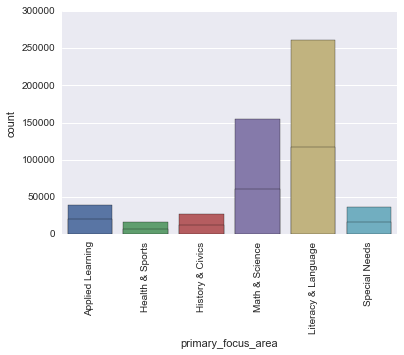

In [16]:
sns.countplot(funded.primary_focus_area, data = df, order = ['Applied Learning', 'Health & Sports', 'History & Civics', 'Math & Science', 'Literacy & Language', 'Special Needs'])
sns.countplot(not_funded.primary_focus_area, data = df, order = ['Applied Learning', 'Health & Sports', 'History & Civics', 'Math & Science', 'Literacy & Language', 'Special Needs'])
plt.xticks(rotation = 90)
plt.show()

In [24]:
order = funded.grade_level.values.tolist()
order = set(order)
order = ['Grades 3-5',
 'Grades 6-8',
 'Grades 9-12',
 'Grades PreK-2']

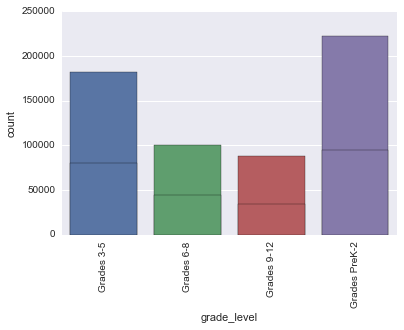

In [27]:
sns.countplot(funded.grade_level, data = df, order = order)
sns.countplot(not_funded.grade_level, data = df, order = order)
plt.xticks(rotation = 90)
plt.show()

In [38]:
reduced_df = df[[
 'school_state',
 'school_district',
 'school_charter',
 'school_magnet',
 'school_year_round',
 'school_nlns',
 'school_kipp',
 'school_charter_ready_promise',
 'teacher_prefix',
 'teacher_teach_for_america',
 'teacher_ny_teaching_fellow',
 'primary_focus_subject',
 'primary_focus_area',
 'resource_type',
 'poverty_level',
 'grade_level',
 'total_price_including_optional_support',
 'students_reached',
 'total_donations',
 'num_donors',
 'eligible_double_your_impact_match',
 'eligible_almost_home_match',
 'funding_status',
 'date_posted',
 'date_completed',
'RESP',
 'amount_optional_support',
 'teacher_previous_projects',
 'school_previous_projects']]

In [39]:
reduced_df.groupby("RESP").mean()

,school_charter,school_magnet,school_year_round,school_nlns,school_kipp,school_charter_ready_promise,teacher_teach_for_america,teacher_ny_teaching_fellow,total_price_including_optional_support,students_reached,total_donations,num_donors,amount_optional_support,teacher_previous_projects,school_previous_projects
RESP,,,,,,,,,,,,,,,
0,0.922986,0.917074,0.983244,0.991231,0.995864,0.997139,0.969638,0.99064,940.584979,105.352810,59.266753,1.409034,148.815711,6.038543,33.576515
1,0.904671,0.905821,0.984575,0.984965,0.993065,0.995265,0.939275,0.98275,579.511915,92.508043,567.216116,5.742431,90.204739,7.191741,41.157662


In [40]:
scatter_df = df[[
 'primary_focus_subject',
 'primary_focus_area',
 'resource_type',
 'poverty_level',
 'grade_level',
 'total_price_including_optional_support',
 'students_reached',
 'total_donations',
 'num_donors',
 'funding_status',
 'date_posted',
 'date_completed',
'RESP',
 'amount_optional_support',
 'teacher_previous_projects',
 'school_previous_projects']]

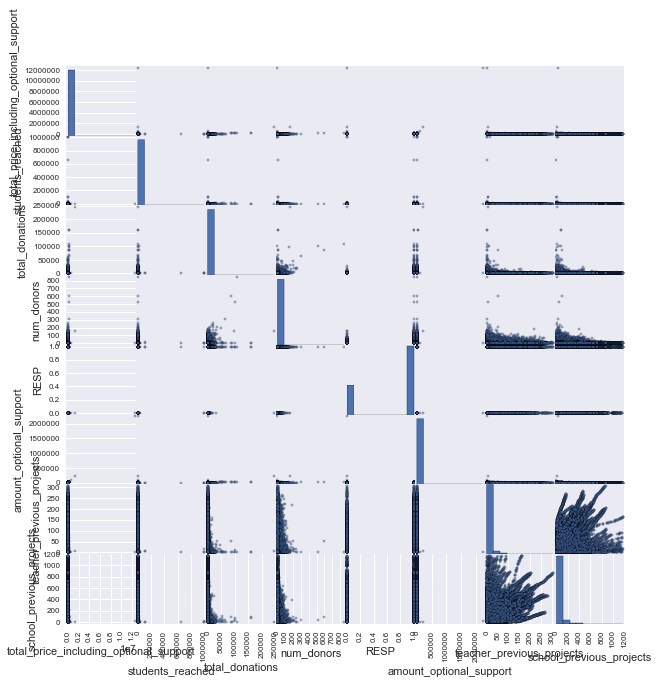

In [41]:
d